<a href="https://colab.research.google.com/github/highshuang/biostat_deep_learning_spring_2021/blob/develop/HW3_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras #
import numpy as np
##import data: 
## mount your google drive: 
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#!pip install imgaug
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

(60000, 28, 28)
(60000,)


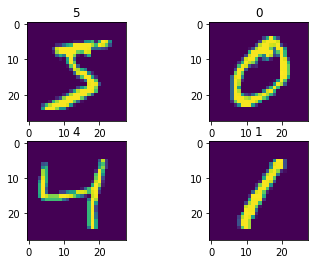

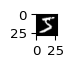

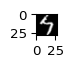

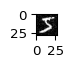

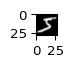

In [8]:
##path = 'drive/My Drive/deep-learning-colab/mnist.npz'
path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
print(train_images.shape)
print(train_labels.shape)
fig, axs = plt.subplots(2,2)
for ii in np.arange(0,2):
    for jj in np.arange(0,2):
        axs[ii,jj].imshow(train_images[ii*2+jj,:,:])
        axs[ii,jj].title.set_text(train_labels[ii*2+jj])
##print(range(0,2))
##plt.show()

# example of the image transformation 
image = train_images[0,:,:]
ia.imshow(image)

# 1. rotation between -50 degree to 30 degree
rotate=iaa.Affine(rotate=(-50, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

# 2. additive gaussian noise 
gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
noise_image=gaussian_noise.augment_image(image)
ia.imshow(noise_image)

# 3. shearing 
shear = iaa.Affine(shear=(0,40))
shear_image=shear.augment_image(image)
ia.imshow(shear_image)


Here, the MNIST dataset has 60000 rows of data points and sample size is relatively small. What we can consider is applying image augmentation to artificially create variations. In this way, we can achieve a rich and diverse data, in order to increase the performance of the model and reduce overfittting.


In [9]:
# Data augmentation technique 1: rotation between -50 to 30 degrees
train_rotate =[]

for i in np.arange(0, 60000):
  image = train_images[i,:,:]
  rotate=iaa.Affine(rotate=(-50, 30))
  rotated_image=rotate.augment_image(image)
  train_rotate.append(rotated_image)

train_rotate = np.asarray(train_rotate)
print(train_rotate.shape)

train_rotate = np.concatenate((train_images, train_rotate), axis=0)
print(train_rotate.shape)



(60000, 28, 28)
(120000, 28, 28)


In [12]:
from keras import models
from keras import layers

# construct a dense NN 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# prepare the dimension and type of input data 
path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
train_rotate = train_rotate.reshape((120000, 28 * 28))
train_rotate = train_rotate.astype('float32') / 255
#train_shear = train_shear.reshape((120000, 28 * 28))
#train_shear = train_shear.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_rotate_labels = np.concatenate((train_labels,train_labels),axis = 0)
#train_shear_labels = train_rotate_labels
print(train_rotate_labels.shape)

# prepare the label format
from keras.utils import to_categorical
train_rotate_labels = to_categorical(train_rotate_labels)
test_labels = to_categorical(test_labels)
print(train_rotate_labels.shape)

# fit the model 
network.fit(train_rotate, train_rotate_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)



(120000,)
(120000, 10)
Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 2.3016 - accuracy: 0.1108
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 2.3010 - accuracy: 0.1136
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 2.3003 - accuracy: 0.1134
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 2.2975 - accuracy: 0.1141
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 22.3938 - accuracy: 0.3575
0.35749998688697815


In [16]:
# Data augmentation technique 2: Shearing the image by 0 to 40 degrees
train_shear =[]

for i in np.arange(0, 60000):
  image = train_images[i,:,:]
  shear = iaa.Affine(shear=(0,40))
  shear_image=shear.augment_image(image)
  train_shear.append(shear_image)

train_shear = np.asarray(train_shear)
print(train_shear.shape)

train_shear = np.concatenate((train_images, train_shear), axis=0)
print(train_shear.shape)

(60000, 28, 28)
(120000, 28, 28)


In [17]:
from keras import models
from keras import layers

# construct a dense NN 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# prepare the dimension and type of input data 
path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
train_shear = train_shear.reshape((120000, 28 * 28))
train_shear = train_shear.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_shear_labels = np.concatenate((train_labels,train_labels),axis = 0)

print(train_shear_labels.shape)

# prepare the label format
from keras.utils import to_categorical
train_shear_labels = to_categorical(train_shear_labels)
test_labels = to_categorical(test_labels)
train_shear_labels.shape

# fit the model 
network.fit(train_shear, train_shear_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

(120000,)
Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.3732 - accuracy: 0.8906
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0921 - accuracy: 0.9730
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0586 - accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0420 - accuracy: 0.9872
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9816
0.9815999865531921


In [14]:
# Data augmentation technique 3: Adding noise to the image
train_noise =[]

for i in np.arange(0, 60000):
  image = train_images[i,:,:]
  gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
  noise_image=gaussian_noise.augment_image(image)
  train_noise.append(noise_image)

train_noise = np.asarray(train_noise)
print(train_noise.shape)

train_noise = np.concatenate((train_images, train_noise), axis=0)
print(train_noise.shape)

(60000, 28, 28)
(120000, 28, 28)


In [15]:
from keras import models
from keras import layers

# construct a dense NN 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# prepare the dimension and type of input data 
path = 'mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
train_noise = train_noise.reshape((120000, 28 * 28))
train_noise = train_noise.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_noise_labels = np.concatenate((train_labels,train_labels),axis = 0)

print(train_noise_labels.shape)

# prepare the label format
from keras.utils import to_categorical
train_noise_labels = to_categorical(train_noise_labels)
test_labels = to_categorical(test_labels)
train_noise_labels.shape

# fit the model 
network.fit(train_noise, train_noise_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)


(120000,)
Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.3499 - accuracy: 0.8966
Epoch 2/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0692 - accuracy: 0.9784
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0364 - accuracy: 0.9885
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0209 - accuracy: 0.9938
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9821
0.9821000099182129


Results:
1. With no data augmentation, the accuracy on test data is 0.9795. 
2. With rotation, the accuracy on test data is 0.3575.
3. With adding guassian noise to the images, teh accuracy on the test data is 0.9821, which has better performance than the fitting without data augmentation. 
4. With adding guassian noise to the images, teh accuracy on the test data is 0.9816, which has better performance than the fitting without data augmentation. 

Discussion:
1. It is not surprising to have a very poor performance when apply the rotation transformation. When we consider the handwritten digits, it might not be useful to use rotation transformation. Because for digit 6, rotation may increase ambiguity between digit 6 and 9. With the similar reason, flipping and zooming would also not give a better preformance or even give a lot of misclassifications.
2. For adding guassian noise, this transformation still keeps the features of the digits and add the random noise to prevent overfitting. As we can see in the result, it gives a slightly better performance than the one with no data augmentation.
